In [19]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [20]:
imdb,info = tfds.load('imdb_reviews/subwords8k',with_info = True, as_supervised = True)

In [21]:
train,test = imdb['train'],imdb['test']

In [22]:
# Tokenizer
tokenizer = info.features['text'].encoder

In [23]:
# Shuffle and pad the data (Tensors)
BUFFER = 10000
batch_size = 64
train_dataset = train.shuffle(BUFFER)
train_dataset = train_dataset.padded_batch(batch_size,tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test.padded_batch(batch_size,tf.compat.v1.data.get_output_shapes(test))

In [24]:
embed_dims = 32
model1 = tf.keras.models.Sequential([tf.keras.layers.Embedding(tokenizer.vocab_size,embed_dims),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                                    tf.keras.layers.Dense(32,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          261920    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 315,745
Trainable params: 315,745
Non-trainable params: 0
_________________________________________________________________


In [25]:
model1.compile(loss='binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [26]:
history = model1.fit(train_dataset,epochs = 10,validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 59s 142ms/step - loss: 0.6217 - accuracy: 0.6255 - val_loss: 0.4663 - val_accuracy: 0.7898
Epoch 2/10
391/391 [==============================] - 55s 139ms/step - loss: 0.3902 - accuracy: 0.8385 - val_loss: 0.5360 - val_accuracy: 0.8091
Epoch 3/10
391/391 [==============================] - 54s 138ms/step - loss: 0.3706 - accuracy: 0.8549 - val_loss: 0.4607 - val_accuracy: 0.8168
Epoch 4/10
391/391 [==============================] - 55s 140ms/step - loss: 0.3138 - accuracy: 0.8759 - val_loss: 0.5327 - val_accuracy: 0.7457
Epoch 5/10
391/391 [==============================] - 55s 140ms/step - loss: 0.3759 - accuracy: 0.8439 - val_loss: 0.4707 - val_accuracy: 0.8007
Epoch 6/10
391/391 [==============================] - 55s 139ms/step - loss: 0.3039 - accuracy: 0.8789 - val_loss: 0.4331 - val_accuracy: 0.8208
Epoch 7/10
391/391 [==============================] - 55s 139ms/step - loss: 0.2228 - accuracy: 0.9211 - val_loss: 0.4707 - val_ac

In [27]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
model2.compile(loss = 'binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [29]:
history2 = model2.fit(train_dataset,epochs = 10,validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 106s 259ms/step - loss: 0.5942 - accuracy: 0.6414 - val_loss: 0.4604 - val_accuracy: 0.7968
Epoch 2/10
391/391 [==============================] - 100s 254ms/step - loss: 0.3221 - accuracy: 0.8728 - val_loss: 0.3743 - val_accuracy: 0.8539
Epoch 3/10
391/391 [==============================] - 100s 255ms/step - loss: 0.2555 - accuracy: 0.9055 - val_loss: 0.3946 - val_accuracy: 0.8382
Epoch 4/10
391/391 [==============================] - 101s 257ms/step - loss: 0.2208 - accuracy: 0.9166 - val_loss: 0.5537 - val_accuracy: 0.7092
Epoch 5/10
391/391 [==============================] - 100s 255ms/step - loss: 0.4038 - accuracy: 0.8298 - val_loss: 0.3956 - val_accuracy: 0.8396
Epoch 6/10
391/391 [==============================] - 101s 256ms/step - loss: 0.2954 - accuracy: 0.8809 - val_loss: 0.4301 - val_accuracy: 0.8189
Epoch 7/10
391/391 [==============================] - 101s 257ms/step - loss: 0.2077 - accuracy: 0.9222 - val_loss: 0.4511 -

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

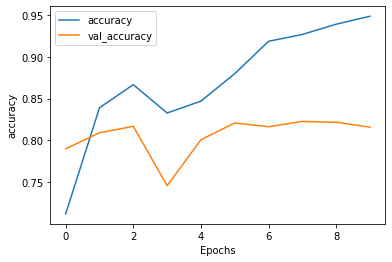

In [31]:
plot_graphs(history, 'accuracy')

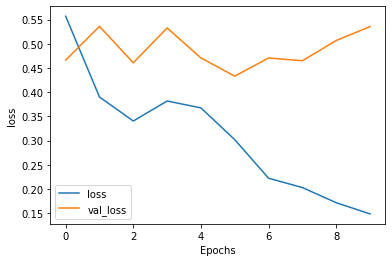

In [32]:
plot_graphs(history, 'loss')

In [33]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

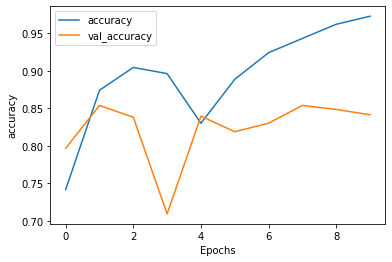

In [34]:
plot_graphs(history2, 'accuracy')

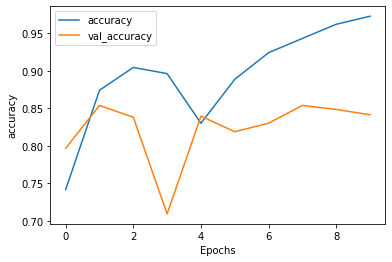

In [35]:
plot_graphs(history2, 'accuracy')